In [282]:
import numpy as np
import pylab as pl
import ot

In [405]:
N = 3
d = 2
n_i = np.random.randint(low=10, high=20)  # nb samples

measures_locations = []
measures_weights = []

mu_i = np.random.normal(0., 4., (d,))  # Gaussian mean
for i in range(N):
    
    A_i = np.random.rand(d, d)
    cov_i = np.dot(A_i, A_i.transpose())  # Gaussian covariance matrix

    x_i = ot.datasets.make_2D_samples_gauss(n_i, mu_i, cov_i)  # Dirac locations
    b_i = (np.array([1]*n_i))
    b_i = b_i / np.sum(b_i)
    
    if N==2:
        s = np.random.normal(3, 4, 20)
        x_i = [list(a) for a in zip(np.arange(0,1,1/20).tolist(), s.tolist())]
    measures_locations.append(x_i)
    measures_weights.append(b_i)

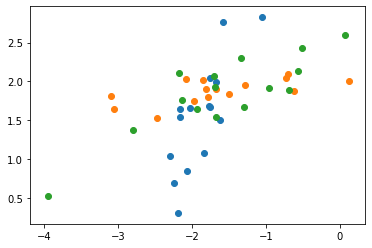

In [406]:
pl.figure(1)
for (x_i, b_i) in zip(measures_locations, measures_weights):
    color = np.random.randint(low=1, high=10 * N)
    pl.scatter(x_i[:, 0], x_i[:, 1], label='input measure')
pl.show()

In [407]:
k = 20  # number of Diracs of the barycenter
X_init = np.random.normal(0., 1., (k, d))  # initial Dirac locations

X_joint = ot.lp.free_support_barycenter(measures_locations, measures_weights, X_init, weights=np.array([1/N]*N))


In [415]:

X_12 = ot.lp.free_support_barycenter(measures_locations[:2], measures_weights[:2], X_init, weights=np.array([1/2,1/2]))


In [418]:
measures_12_3 = [X_12, measures_locations[2]]
weights = [np.ones(len(X_12))/len(X_12), np.ones(len(measures_locations[2]))/len(measures_locations[2])]

dots = []
for i in np.arange(0,1,0.001):
    X_3 = ot.lp.free_support_barycenter(measures_12_3,
                                weights,
                                X_init,
                                weights=np.array([i, 1-i]),
                                                                          numItermax=100)
    M = ot.dist(X_3, X_joint)
    a,b = np.ones((len(X_3),)) / len(X_3), np.ones((len(X_joint),))/len(X_joint)
    G0 = ot.emd(a,b,M)
    dist = np.sum(np.multiply(M,G0))
    if (dist == 0):
        print(k)
    dots.append( dist )


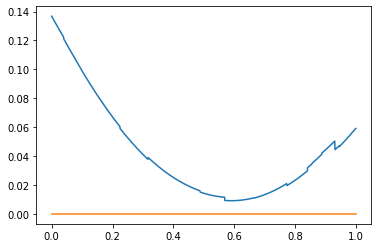

In [419]:
pl.figure(1)
pl.plot(np.arange(0,1,0.001), dots)
pl.plot([0,1],[0,0])

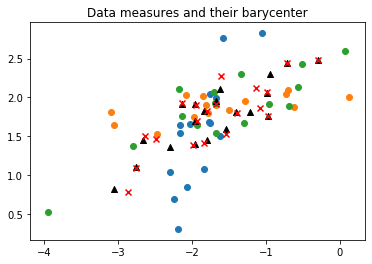

In [411]:
i=2/3
X_3 = ot.lp.free_support_barycenter(measures_12_3,
                                weights,
                                X_init,
                                weights=np.array([i, 1-i]),
                                   numItermax=10000)
pl.figure(1)
for (x_i, b_i) in zip(measures_locations, measures_weights):
    color = np.random.randint(low=1, high=10 * N)
    pl.scatter(x_i[:, 0], x_i[:, 1], label='input measure')
pl.scatter(X_joint[:, 0], X_joint[:, 1], c='black', marker='^', label='2-Wasserstein barycenter')
pl.scatter(X_3[:, 0], X_3[:, 1], c='red', marker='x', label='2-Wasserstein barycenter for 1,2')

pl.title('Data measures and their barycenter')
pl.show()

In [349]:
print(X_3 - X_joint)


[[-1.77635684e-15 -4.44089210e-16]
 [ 4.12920216e-02  5.55305470e-02]
 [-8.00652302e-03 -1.54951711e-02]
 [-1.57692606e-01 -8.06617792e-02]
 [-8.88178420e-16 -4.44089210e-16]
 [-2.86595848e-01 -1.29263599e-01]
 [-2.46166223e-01 -5.89907146e-02]
 [ 6.98979119e-02  1.96541370e-02]
 [ 2.28893799e-01  6.83007857e-02]
 [ 4.88988120e-02  4.20608278e-02]
 [ 8.88178420e-16 -8.88178420e-16]
 [ 1.77635684e-15  4.44089210e-16]
 [-8.88178420e-16 -4.44089210e-16]
 [ 4.24533455e-01  2.64744751e-01]
 [ 4.81088230e-02 -5.29660032e-02]
 [-5.87689208e-02 -1.87703934e-01]
 [-2.36198647e-02 -3.58757279e-02]
 [-2.06250066e-02  7.18531711e-03]
 [ 0.00000000e+00  0.00000000e+00]
 [-6.01498295e-02  1.03480563e-01]]
